In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_excel("P:/python/EastWestAirlines.xlsx", sheet_name = 'data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data[data.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [66]:
data1 = data.copy()

In [67]:
data1 = data1.drop(['ID#'], axis = 1)

In [7]:
data1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [8]:
column_names = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']

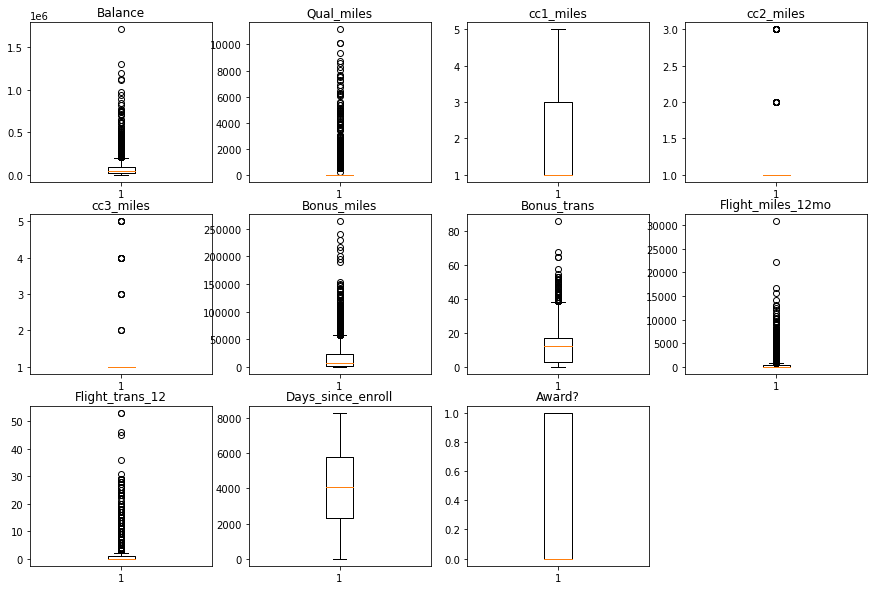

In [68]:
a = 1
plt.figure(figsize = (15, 10))
for i in column_names:
    plt.subplot(3,4,a)
    plt.boxplot(data1[i])
    plt.title(i)
    a = a+1

#### Outlier Treatment

In [69]:
Q1 = data1['Balance'].quantile(0.25)
Q3 = data1['Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bal = Q1 - 1.5*IQR
upper_bal = Q3 + 1.5*IQR
Q1 = data1['Qual_miles'].quantile(0.25)
Q3 = data1['Qual_miles'].quantile(0.75)
IQR = Q3 - Q1
lower_qm = Q1 - 1.5*IQR
upper_qm = Q3 + 1.5*IQR
Q1 = data1['cc2_miles'].quantile(0.25)
Q3 = data1['cc2_miles'].quantile(0.75)
IQR = Q3 - Q1
lower_c2 = Q1 - 1.5*IQR
upper_c2 = Q3 + 1.5*IQR
Q1 = data1['cc3_miles'].quantile(0.25)
Q3 = data1['cc3_miles'].quantile(0.75)
IQR = Q3 - Q1
lower_c3 = Q1 - 1.5*IQR
upper_c3 = Q3 + 1.5*IQR
Q1 = data1['Bonus_miles'].quantile(0.25)
Q3 = data1['Bonus_miles'].quantile(0.75)
IQR = Q3 - Q1
lower_bm = Q1 - 1.5*IQR
upper_bm = Q3 + 1.5*IQR
Q1 = data1['Bonus_trans'].quantile(0.25)
Q3 = data1['Bonus_trans'].quantile(0.75)
IQR = Q3 - Q1
lower_bt = Q1 - 1.5*IQR
upper_bt = Q3 + 1.5*IQR
Q1 = data1['Flight_miles_12mo'].quantile(0.25)
Q3 = data1['Flight_miles_12mo'].quantile(0.75)
IQR = Q3 - Q1
lower_fm = Q1 - 1.5*IQR
upper_fm = Q3 + 1.5*IQR
Q1 = data1['Flight_trans_12'].quantile(0.25)
Q3 = data1['Flight_trans_12'].quantile(0.75)
IQR = Q3 - Q1
lower_ft = Q1 - 1.5*IQR
upper_ft = Q3 + 1.5*IQR

In [70]:
data1['Balance'] = np.where(data1['Balance']>upper_bal,upper_bal,data1['Balance'])
data1['Qual_miles'] = np.where(data1['Qual_miles']>upper_qm,upper_qm,data1['Qual_miles'])
data1['cc2_miles'] = np.where(data1['cc2_miles']>upper_c2,upper_c2,data1['cc2_miles'])
data1['cc3_miles'] = np.where(data1['cc3_miles']>upper_c3,upper_c3,data1['cc3_miles'])
data1['Bonus_miles'] = np.where(data1['Bonus_miles']>upper_bm,upper_bm,data1['Bonus_miles'])
data1['Bonus_trans'] = np.where(data1['Bonus_trans']>upper_bt,upper_bt,data1['Bonus_trans'])
data1['Flight_miles_12mo'] = np.where(data1['Flight_miles_12mo']>upper_fm,upper_fm,data1['Flight_miles_12mo'])
data1['Flight_trans_12'] = np.where(data1['Flight_trans_12']>upper_ft,upper_ft,data1['Flight_trans_12'])

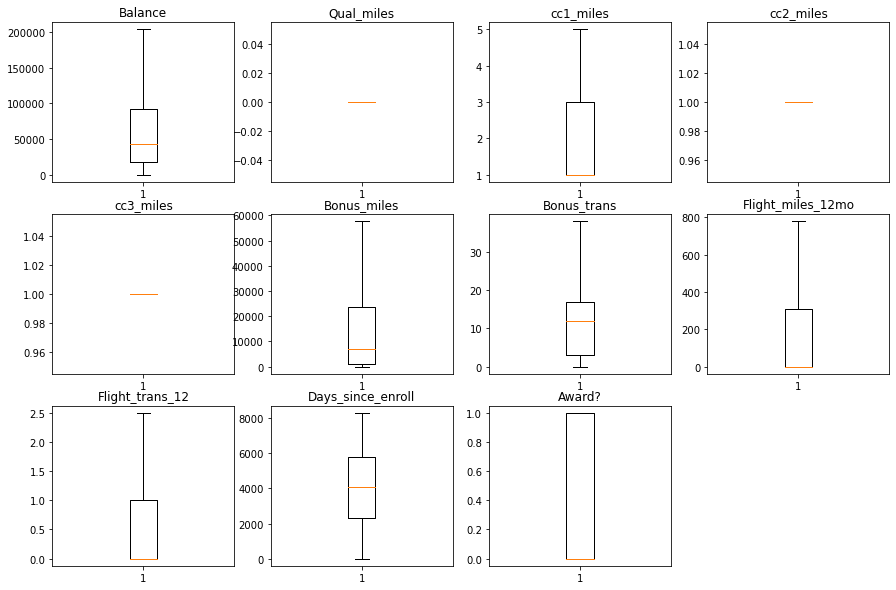

In [71]:
a = 1
plt.figure(figsize = (15, 10))
for i in column_names:
    plt.subplot(3,4,a)
    plt.boxplot(data1[i])
    plt.title(i)
    a = a+1

In [87]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1
3995,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1
3996,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1
3997,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0


C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

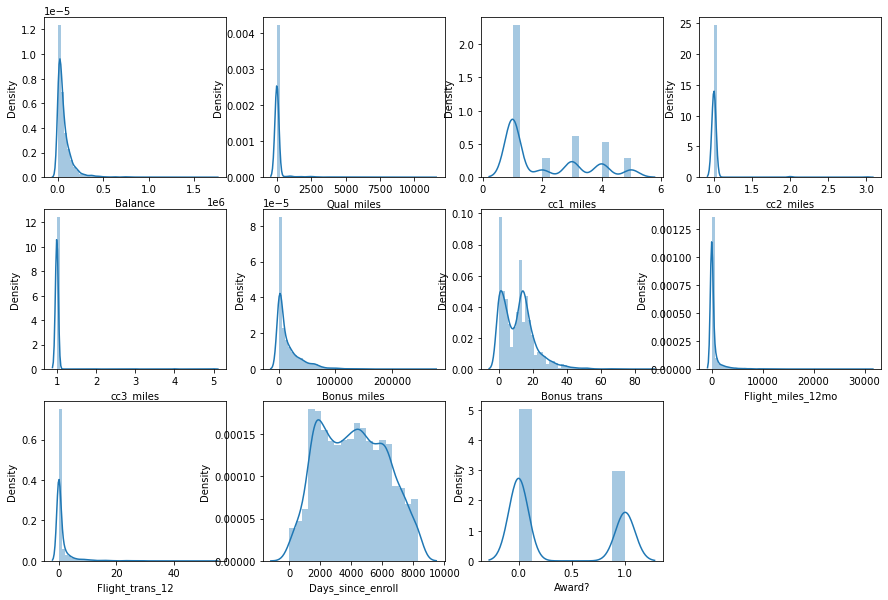

In [24]:
a = 1
plt.figure(figsize = (15, 10))
for i in column_names:
    plt.subplot(3,4,a)
    sns.distplot(data1[i])
    a = a+1

#### Transformation

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: F

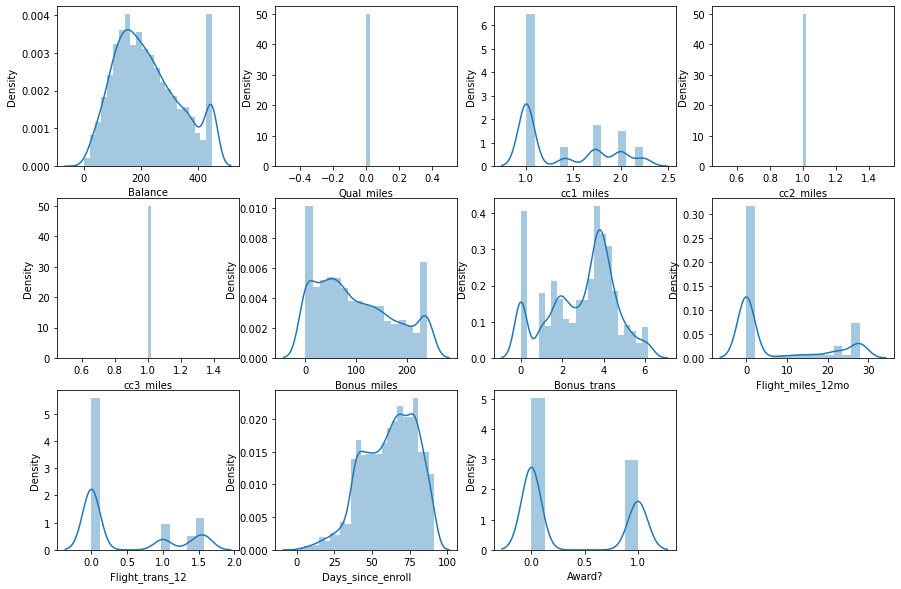

In [75]:
plot = 1
plt.figure(figsize = (15, 10))
for j in column_names:
    s = np.sqrt(data1[j])
    plt.subplot(3, 4, plot)
    sns.distplot(s)
    plot = plot + 1

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: F

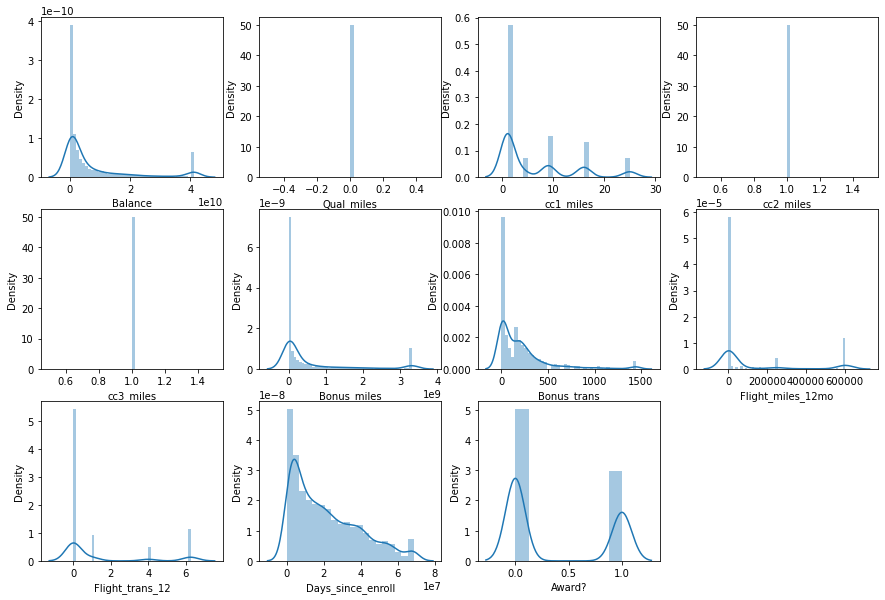

In [81]:
plot = 1
plt.figure(figsize = (15, 10))
for j in column_names:
    sq = np.square(data1[j])
    plt.subplot(3, 4, plot)
    sns.distplot(sq)
    plot = plot + 1

# Hierarchical Clustering

In [88]:
# normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [90]:
data1_norm = norm_func(data1.iloc[:,0:])
data1_norm = data1_norm.fillna(0)
data1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.138486,0.0,0.00,0.0,0.0,0.003019,0.026316,0.000000,0.0,0.843742,0.0
1,0.094696,0.0,0.00,0.0,0.0,0.003731,0.052632,0.000000,0.0,0.839884,0.0
2,0.203495,0.0,0.00,0.0,0.0,0.071547,0.105263,0.000000,0.0,0.847842,0.0
3,0.072710,0.0,0.00,0.0,0.0,0.008677,0.026316,0.000000,0.0,0.837955,0.0
4,0.481019,0.0,0.75,0.0,0.0,0.751394,0.684211,1.000000,1.0,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.090917,0.0,0.00,0.0,0.0,0.147936,0.105263,0.257235,0.4,0.168917,1.0
3995,0.316826,0.0,0.00,0.0,0.0,0.017023,0.131579,0.000000,0.0,0.167953,1.0
3996,0.362157,0.0,0.50,0.0,0.0,0.441587,0.210526,0.000000,0.0,0.168797,1.0
3997,0.270147,0.0,0.00,0.0,0.0,0.008677,0.026316,0.643087,0.4,0.168676,0.0


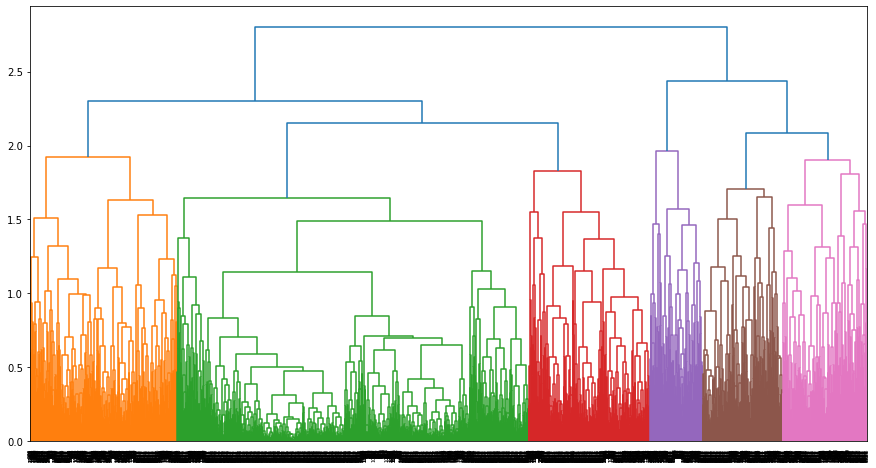

In [92]:
plt.figure(figsize=(15, 8)) 
dendrogram = sch.dendrogram(sch.linkage(data1_norm, method='complete'))

In [165]:
model = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [166]:
preds = model.fit_predict(data1_norm)
Clusters=pd.DataFrame(preds,columns=['Clusters'])
Clusters.value_counts()

Clusters
4           1678
1            703
3            582
2            404
5            381
0            251
dtype: int64

In [167]:
silhouette_score(data1_norm, preds)

0.35644520939951463

In [115]:
data1['Clusters'] = Clusters
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1,2
3995,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1,2
3996,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1,2
3997,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0,3


In [168]:
data1.groupby('Clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_kmeans,clusters_dbscan
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusters,,,,,,,,,,,,,
0,52459.939627,0.0,1.721172,1.0,1.0,9879.551867,8.721645,14.402647,0.070652,3807.820416,0,1.118147,0
1,106842.286547,0.0,2.563559,1.0,1.0,27630.145127,19.934322,732.643008,2.340042,4876.891949,1,2.561441,1
2,62783.009663,0.0,2.707631,1.0,1.0,23324.599108,13.397423,83.917245,0.316155,4507.258672,1,0.785927,1
3,75193.846393,0.0,1.621891,1.0,1.0,10314.505597,11.166667,624.598259,1.971393,3888.194030,0,2.910448,1


# K-Means

In [116]:
# standardization
scaler = StandardScaler()
data1_std = scaler.fit_transform(data1.iloc[:,0:])

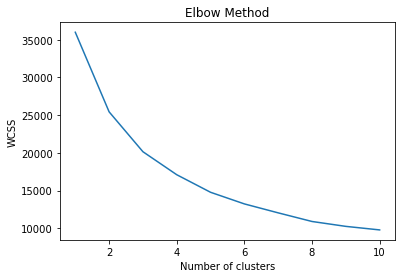

In [117]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data1_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
model_km = KMeans(4, random_state=42)
preds_km = model_km.fit_predict(data1_std)

In [119]:
data1['Clusters_kmeans'] = preds_km

In [120]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,Clusters_kmeans
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0,0,1
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0,0,1
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0,0,1
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0,0,1
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1,2,0
3995,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1,2,0
3996,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1,2,0
3997,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0,3,3


In [121]:
data1.Clusters_kmeans.value_counts()

1    1866
2     786
3     700
0     647
Name: Clusters_kmeans, dtype: int64

In [122]:
data1.groupby('Clusters_kmeans').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusters_kmeans,,,,,,,,,,,,
0,44133.179289,0.0,2.092736,1.0,1.0,13734.411515,11.262751,26.802164,0.117465,4308.469861,1.000000,2.000000
1,40759.329046,0.0,1.396570,1.0,1.0,5558.167872,7.437299,7.529475,0.052519,3644.234727,0.000000,0.000000
2,121998.200700,0.0,4.248092,1.0,1.0,45839.217875,21.151399,288.858779,0.931298,5115.916031,0.636132,1.146310
3,77870.162500,0.0,1.338571,1.0,1.0,9057.401786,11.544286,648.015000,2.085000,4087.552857,0.477143,2.144286


# DBSCAN

In [123]:
# standardization
data1_std

array([[-0.60725829,  0.        , -0.76957841, ...,  1.39545434,
        -0.7669193 , -0.85161611],
       [-0.75894657,  0.        , -0.76957841, ...,  1.37995704,
        -0.7669193 , -0.85161611],
       [-0.38206963,  0.        , -0.76957841, ...,  1.41192021,
        -0.7669193 , -0.85161611],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -1.31560393,
         1.30391816,  0.99124798],
       [-0.15118775,  0.        , -0.76957841, ..., -1.31608822,
        -0.7669193 ,  1.91268002],
       [-1.03556163,  0.        , -0.76957841, ..., -1.31754109,
        -0.7669193 , -0.85161611]])

In [135]:
model2 = DBSCAN(eps=2.3, min_samples=20)
preds_dbscan = model2.fit_predict(data1_std)
silhouette_score(data1_std, preds_dbscan)

0.2993762708170683

In [136]:
preds_dbscan

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [138]:
data1['clusters_dbscan'] = preds_dbscan

In [139]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,Clusters_kmeans,clusters_dbscan
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0,0,1,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0,0,1,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0,0,1,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0,0,1,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1,2,0,1
3995,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1,2,0,1
3996,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1,2,0,1
3997,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0,3,3,1


In [140]:
data1['clusters_dbscan'].value_counts()

0    2116
1    1883
Name: clusters_dbscan, dtype: int64

In [143]:
data1.groupby('clusters_dbscan').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,Clusters_kmeans
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_dbscan,,,,,,,,,,,,,
0,52459.939627,0.0,1.721172,1.0,1.0,9879.551867,8.721645,14.402647,0.070652,3807.820416,0.000000,0.000000,1.118147
1,76476.655470,0.0,2.439724,1.0,1.0,21626.330457,14.559745,361.958842,1.176845,4467.748805,0.786511,1.962825,1.684546


First i have loaded a dataset and started with EDA phase. Then by moving to EDA the names of the columns and familiar with python, after that in this data there is no null values and no duplicates. I have check with an outliers and many outliers are there in data and i have treated that outliers by calculating IQR. And no dimension is following normal distribution. And i have done transformations, after the doing transformations also data is not following normal distribution. For performing the clustering techniques the data should be in normalized or standardized the reason is, for dividing the data in clusters we have to find the distance and plot the dendrograms. Finding the distance and ploting the dendrograms the data points shoulds be near to each other. If the data points are not near finding the distance is difficultly. So, i have done the normalization which is in 0's and 1's and standardization which have mean=0 and standard deviation=1.

###### Hierarchical
In hierarchical i have started with ploting a dendrogram with linkage method is complete. I have build a model with AgglomerativeClustering by giving n-clusters=6 , euclidean distance and linkage is complete. And i have fitted the data on model. Then the data is divided in six clusters. Finally the mean value of the ever cluster is not near.

###### K-Means
In K-Means i have plotted a k-plot for finding a no. of clusters to create and i have observed four cluster is better. Then i have build a model with Kmeans by giving no. of clusters=4 and random state. And i have fitted the data on model. Then the data is divided into four clusters. Amd the mean of the clusters in not near.

###### DBSCAN
In DBSCAN i have build a model with dbscan by giving epslion=2.3 and min-samples=20. And i have fitted the data on model. Then the data is divided into two clusters. And the mean of the clusters is not near.